## **Importing Required Packages**


In [113]:
# Basic Data Handling
import pandas as pd
import numpy as np
import datetime as dt
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
%matplotlib inline
sns.set(style='whitegrid')

# Display settings
pd.set_option('display.max_columns', None)


## **Loading Data**

In [28]:
df_original = pd.read_csv(r'C:\Users\USER\Desktop\Project\data\comm_bread.csv')
print("done")

# ✅ Create a safe copy for EDA
df = df_original.copy()

# Preview the data
df.head()


done


,OrderID,OrderDate,customer_name,product_name,Quantity,price_per_carton,discount,revenue,cogs,location,sales_reps,payment_method,order_status,delivery_time
0,10000,44197,Bradenburg Multichoice,500pcs in a jar,40,51600,0,2064000,1720000,Ogun,Tunde Ogunleye,Cash,Delivered,2
1,10001,44197,Real Treasure Christian Bookshop,100pcs in a jar,3,50400,0,151200,126000,Oyo,Yemi Akande,Cash,Delivered,5
2,10002,44197,Css Bookshop,100pcs in nylon,2,80000,0,160000,130000,Lagos,Adeola Johnson,Bank Transfer,Delivered,3
3,10003,44197,Deprince Supermarket,100pcs in a jar,7,50400,0,352800,294000,Lagos,Funmi Adebayo,Bank Transfer,Delivered,1
4,10004,44197,Deprince Supermarket,100pcs in a jar,3,50400,0,151200,126000,Lagos,Funmi Adebayo,Bank Transfer,Delivered,1


## **Data Exploration**

In [29]:
df.shape

(15678, 14)

In [30]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderID,15678.0,NaN,NaN,NaN,18007.746651,4617.808491,10000.0,14008.25,18021.5,22005.75,25999.0
OrderDate,15678.0,NaN,NaN,NaN,44676.181082,270.238446,44197.0,44460.0,44665.0,44910.0,45143.0
customer_name,15678,8,The Lamb Christian Bookshop,2053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,15678,4,100pcs in a jar,4817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,15678.0,NaN,NaN,NaN,9.865098,24.177088,1.0,2.0,4.0,9.0,1120.0
price_per_carton,15678.0,NaN,NaN,NaN,56912.029596,11557.070261,50400.0,50400.0,51600.0,51600.0,80000.0
discount,15678.0,NaN,NaN,NaN,0.963133,3.184756,0.0,0.0,0.0,0.0,15.0
revenue,15678.0,NaN,NaN,NaN,556947.442276,1351650.145916,50400.0,151200.0,240000.0,516000.0,56448000.0
cogs,15678.0,NaN,NaN,NaN,441486.222732,1126219.878535,-47040000.0,86000.0,195000.0,430000.0,43430000.0
location,15530,6,Lagos,7923,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15678 entries, 0 to 15677
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrderID           15678 non-null  int64 
 1   OrderDate         15678 non-null  int64 
 2   customer_name     15678 non-null  object
 3   product_name      15678 non-null  object
 4   Quantity          15678 non-null  int64 
 5   price_per_carton  15678 non-null  int64 
 6   discount          15678 non-null  int64 
 7   revenue           15678 non-null  int64 
 8   cogs              15678 non-null  int64 
 9   location          15530 non-null  object
 10  sales_reps        14371 non-null  object
 11  payment_method    15678 non-null  object
 12  order_status      15678 non-null  object
 13  delivery_time     15678 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.7+ MB


In [32]:
# Convert Excel serial number to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], origin='1899-12-30', unit='D')

In [ ]:
# Readable formatted strings
df['week'] = df['OrderDate'].dt.strftime('%Y-W%V')
df['month'] = df['OrderDate'].dt.strftime('%Y-%m')
df['quarter'] = df['OrderDate'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['OrderDate'].dt.strftime('%Y')
df['month_name'] = df['OrderDate'].dt.strftime('%b')

# Also keep numeric values (for filtering/trends)
df['OrderYear'] = df['OrderDate'].dt.year
df['OrderMonth'] = df['OrderDate'].dt.month

# positivre values for cogs
df['cogs'] = df['cogs'].abs()


In [34]:
df.head()

,OrderID,OrderDate,customer_name,product_name,Quantity,price_per_carton,discount,revenue,cogs,location,sales_reps,payment_method,order_status,delivery_time,week,month,quarter,year,month_name,OrderYear,OrderMonth
0,10000,2021-01-01,Bradenburg Multichoice,500pcs in a jar,40,51600,0,2064000,1720000,Ogun,Tunde Ogunleye,Cash,Delivered,2,2021-W53,2021-01,2021-Q1,2021,Jan,2021,1
1,10001,2021-01-01,Real Treasure Christian Bookshop,100pcs in a jar,3,50400,0,151200,126000,Oyo,Yemi Akande,Cash,Delivered,5,2021-W53,2021-01,2021-Q1,2021,Jan,2021,1
2,10002,2021-01-01,Css Bookshop,100pcs in nylon,2,80000,0,160000,130000,Lagos,Adeola Johnson,Bank Transfer,Delivered,3,2021-W53,2021-01,2021-Q1,2021,Jan,2021,1
3,10003,2021-01-01,Deprince Supermarket,100pcs in a jar,7,50400,0,352800,294000,Lagos,Funmi Adebayo,Bank Transfer,Delivered,1,2021-W53,2021-01,2021-Q1,2021,Jan,2021,1
4,10004,2021-01-01,Deprince Supermarket,100pcs in a jar,3,50400,0,151200,126000,Lagos,Funmi Adebayo,Bank Transfer,Delivered,1,2021-W53,2021-01,2021-Q1,2021,Jan,2021,1


In [35]:
# ✅ Step 2.1: Calculate derived metrics
df['profit'] = df['revenue'] - df['cogs']
df['profit_margin'] = df['profit'] / df['revenue']


## **Descriptive stats for key columns**

In [36]:
# ✅ Step 2.2: Select key columns for stats
cols_to_describe = ['Quantity', 'price_per_carton', 'discount', 'revenue', 'cogs', 'delivery_time', 'profit', 'profit_margin']

# Display descriptive statistics
print("\n Descriptive Statistics:")
print(df[cols_to_describe].describe().T)

# Check for skewness (optional but insightful)
print("\n Skewness of Columns:")
print(df[cols_to_describe].skew())



 Descriptive Statistics:
                    count           mean           std           min  \
Quantity          15678.0       9.865098  2.417709e+01      1.000000   
price_per_carton  15678.0   56912.029596  1.155707e+04  50400.000000   
discount          15678.0       0.963133  3.184756e+00      0.000000   
revenue           15678.0  556947.442276  1.351650e+06  50400.000000   
cogs              15678.0  461088.467917  1.118337e+06  42000.000000   
delivery_time     15678.0       3.466577  5.300753e+00      1.000000   
profit            15678.0   95858.974359  2.338016e+05   8400.000000   
profit_margin     15678.0       0.170834  8.333998e-03      0.166667   

                            25%            50%            75%           max  
Quantity               2.000000       4.000000       9.000000  1.120000e+03  
price_per_carton   50400.000000   51600.000000   51600.000000  8.000000e+04  
discount               0.000000       0.000000       0.000000  1.500000e+01  
revenue      

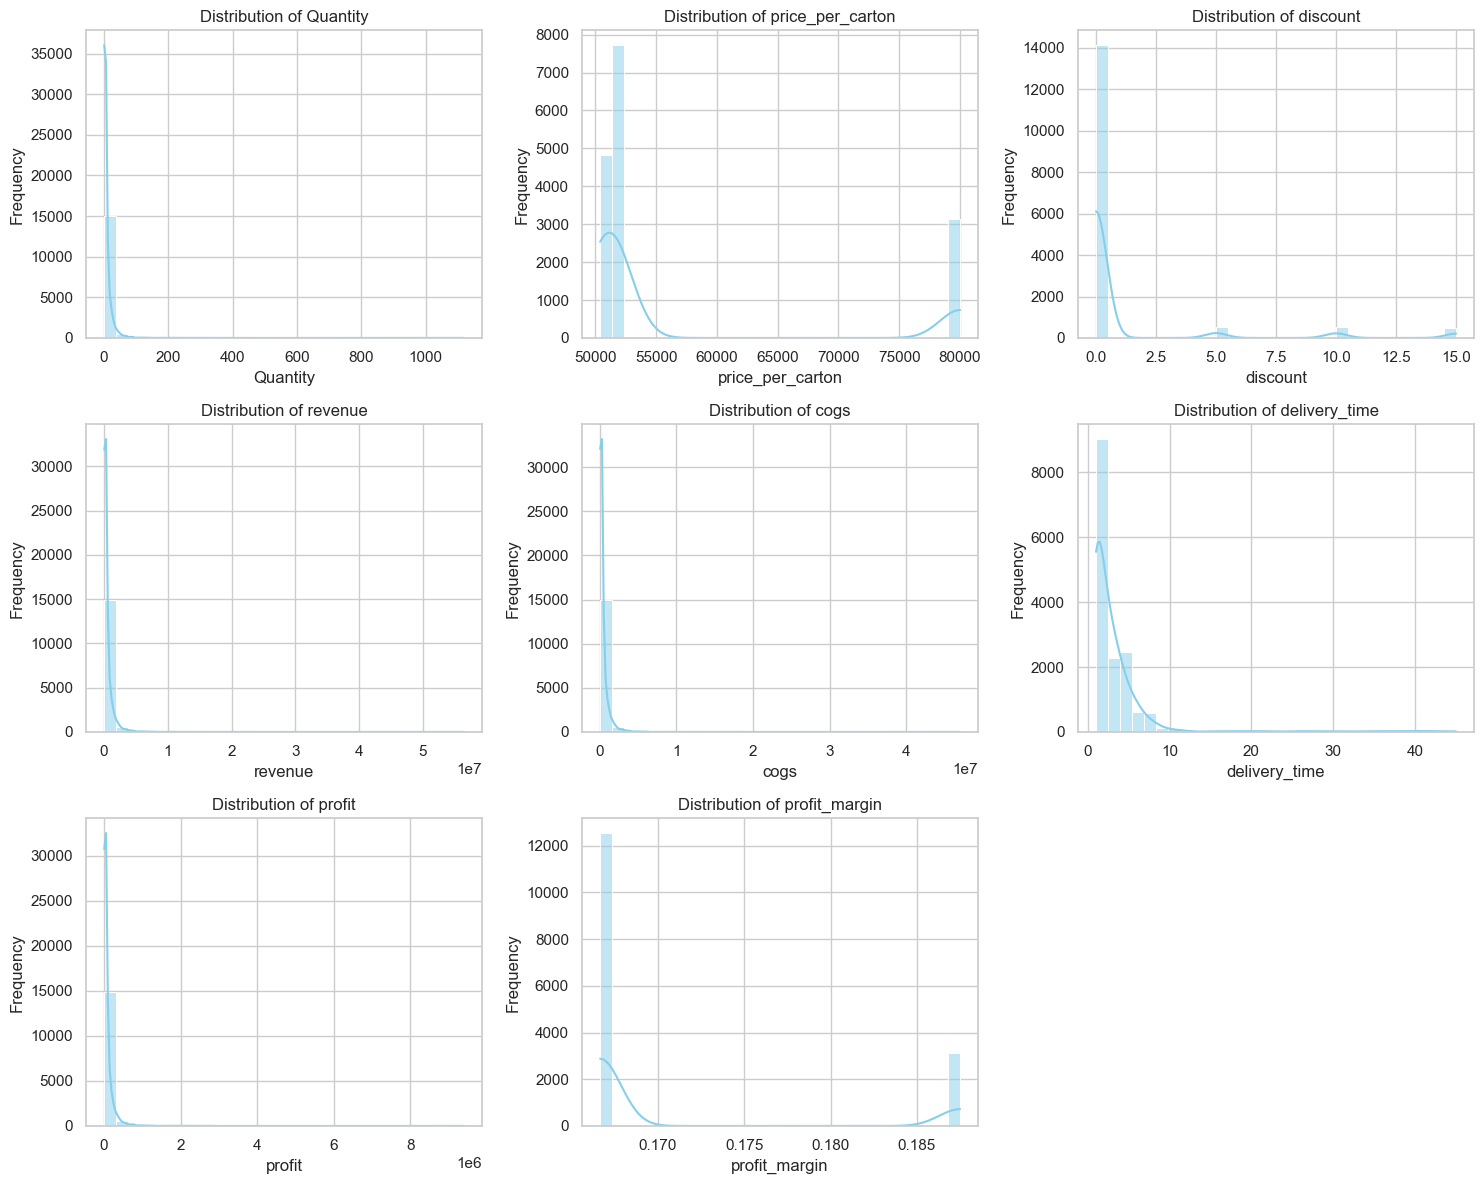

In [37]:
# Visualize the distribution of key metrics
plt.figure(figsize=(15, 12))

# List of columns to plot
cols_to_plot = ['Quantity', 'price_per_carton', 'discount', 'revenue', 'cogs', 'delivery_time', 'profit', 'profit_margin']

# Plot histograms
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


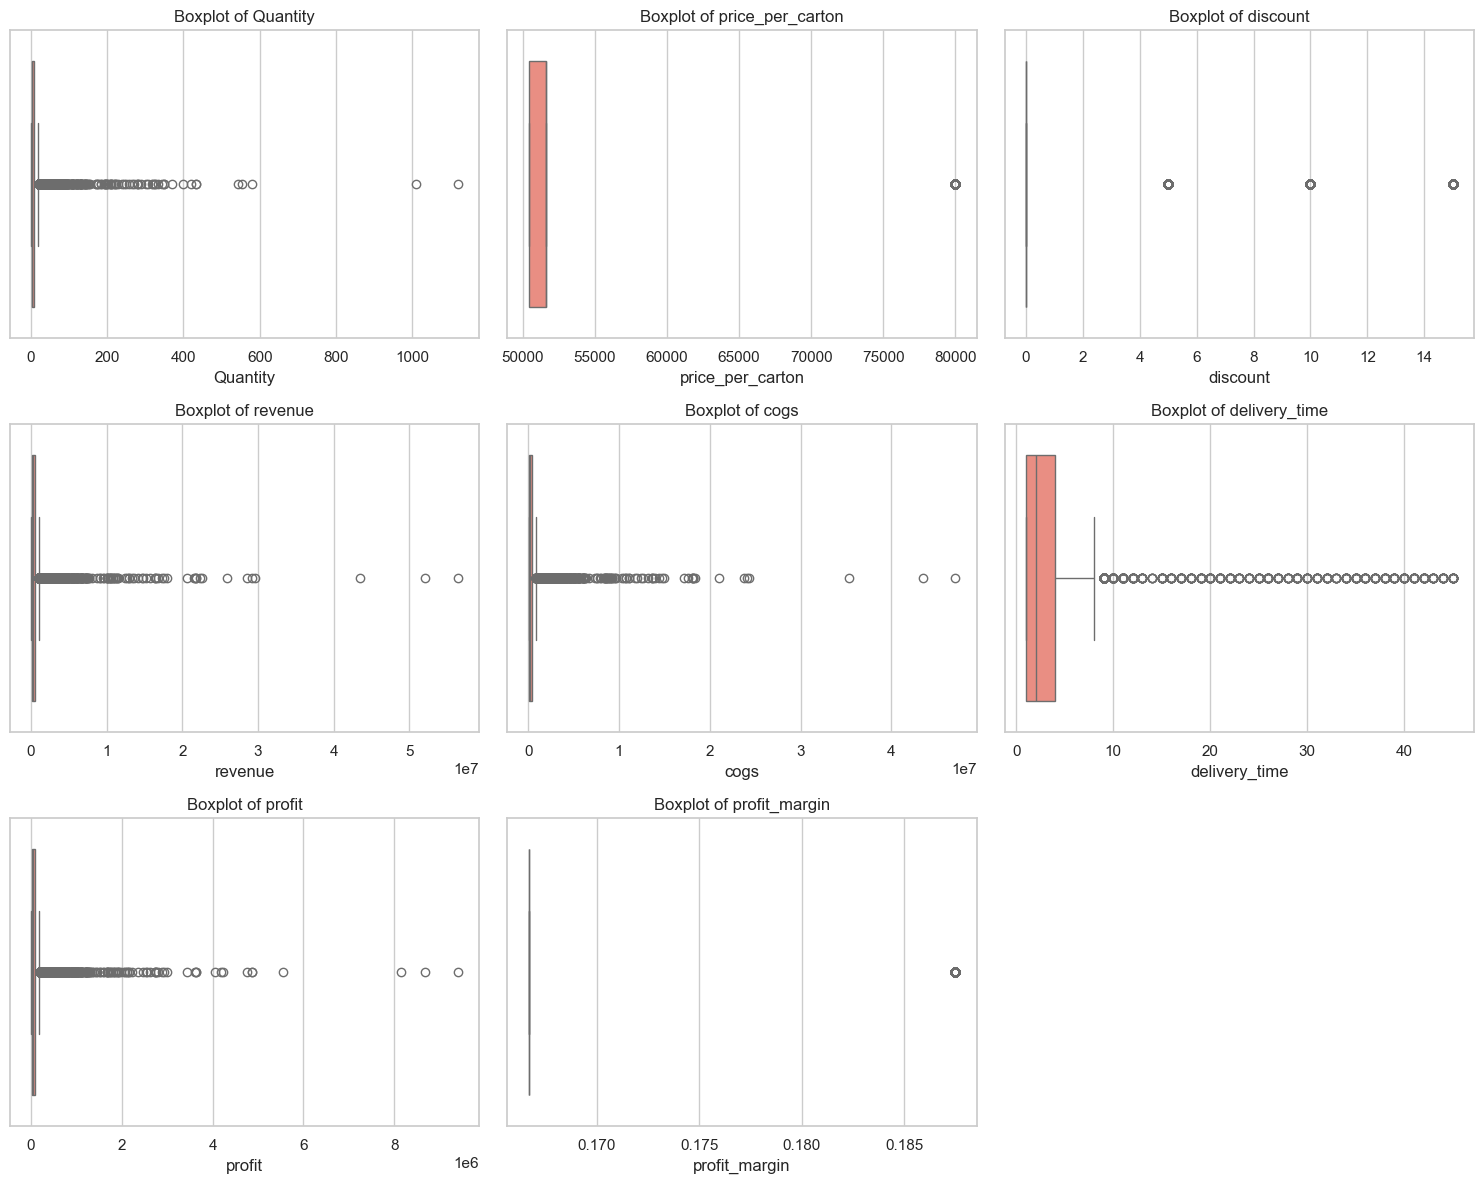

In [38]:
# Visualize the distribution of key metrics using boxplots
plt.figure(figsize=(15, 12))

# Plot boxplots
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


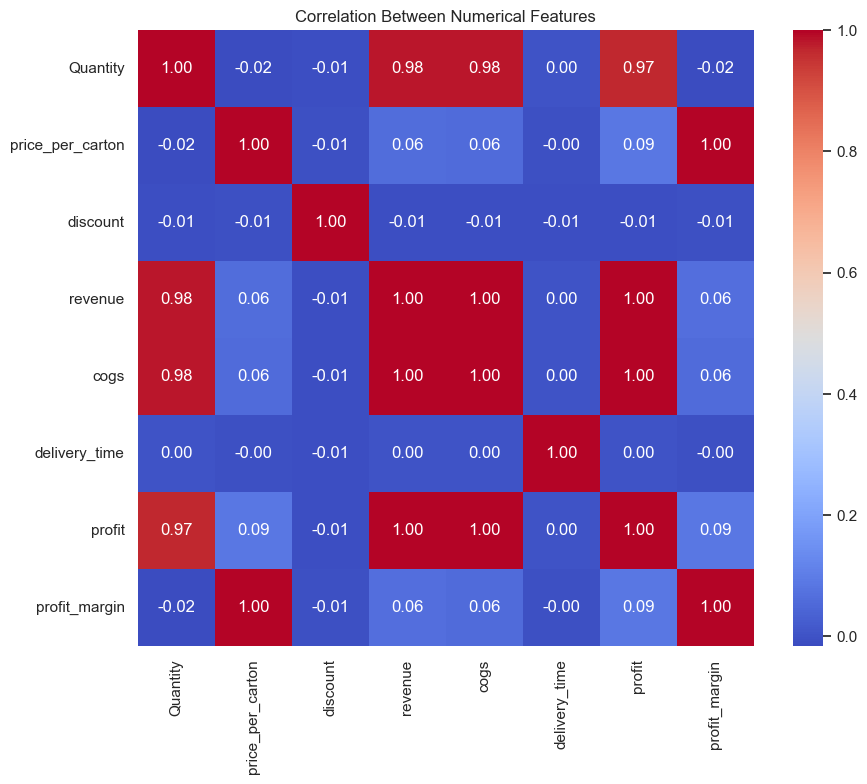

In [39]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Numerical Features")
plt.show()


## **Trend Analysis Over Time**

In [40]:
# Calculate the mean sum of revenue for each week in 2018.
df_year = df[['year','revenue']].groupby(['year']).sum().reset_index()
df_year.head()

,year,revenue
0,2021,3392310000
1,2022,3379580000
2,2023,1959932000


C:\Users\USER\AppData\Local\Temp\ipykernel_15232\2284493867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='revenue', data=df_year, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_15232\2284493867.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{y/1e9:.1f}B' for y in plt.gca().get_yticks()])


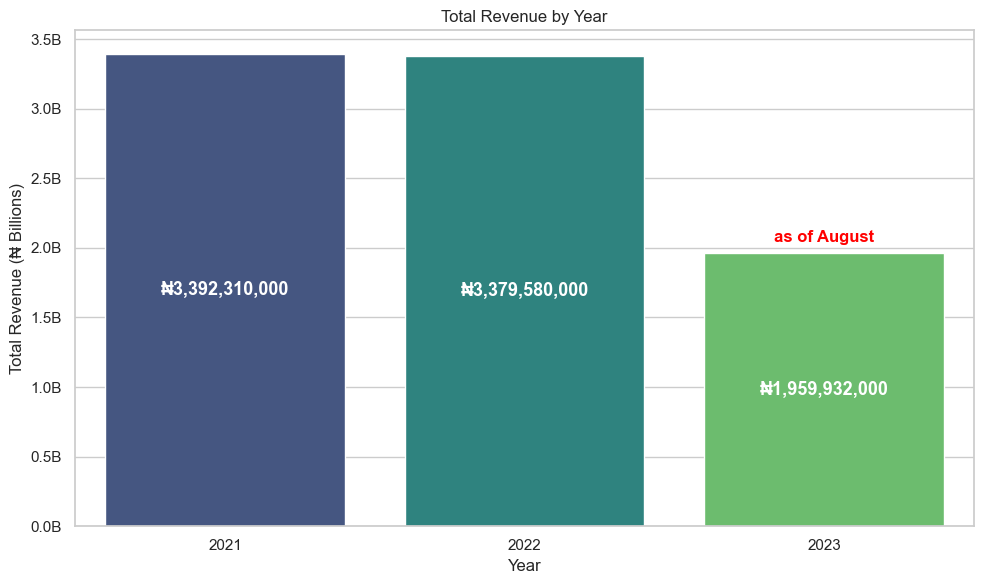

In [141]:
# Bar plot of revenue by year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='revenue', data=df_year, palette='viridis')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue (₦ Billions)')

# Format y-axis labels in billions with one decimal
plt.gca().set_yticklabels([f'{y/1e9:.1f}B' for y in plt.gca().get_yticks()])

# Add actual revenue figures inside the bars
for i, row in df_year.iterrows():
    plt.text(
        i, 
        row['revenue'] / 2,  # position at half the bar height
        f"₦{row['revenue']:,}", 
        ha='center', 
        va='center', 
        color='white', 
        fontsize=13, 
        fontweight='bold'
    )

# Annotate the top of 2023 bar with 'as of August'
idx_2023 = df_year[df_year['year'] == '2023'].index[0]
revenue_2023 = df_year.loc[idx_2023, 'revenue']
plt.text(
    idx_2023, 
    revenue_2023 + revenue_2023 * 0.03,  # slightly above the bar
    'as of August', 
    ha='center', 
    va='bottom', 
    color='red', 
    fontsize=12, 
    fontweight='bold'
)

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15232\1449485068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='revenue', data=df_year, palette='viridis', ax=axes[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_15232\1449485068.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels([f'{y/1e9:.1f}B' for y in axes[0].get_yticks()])


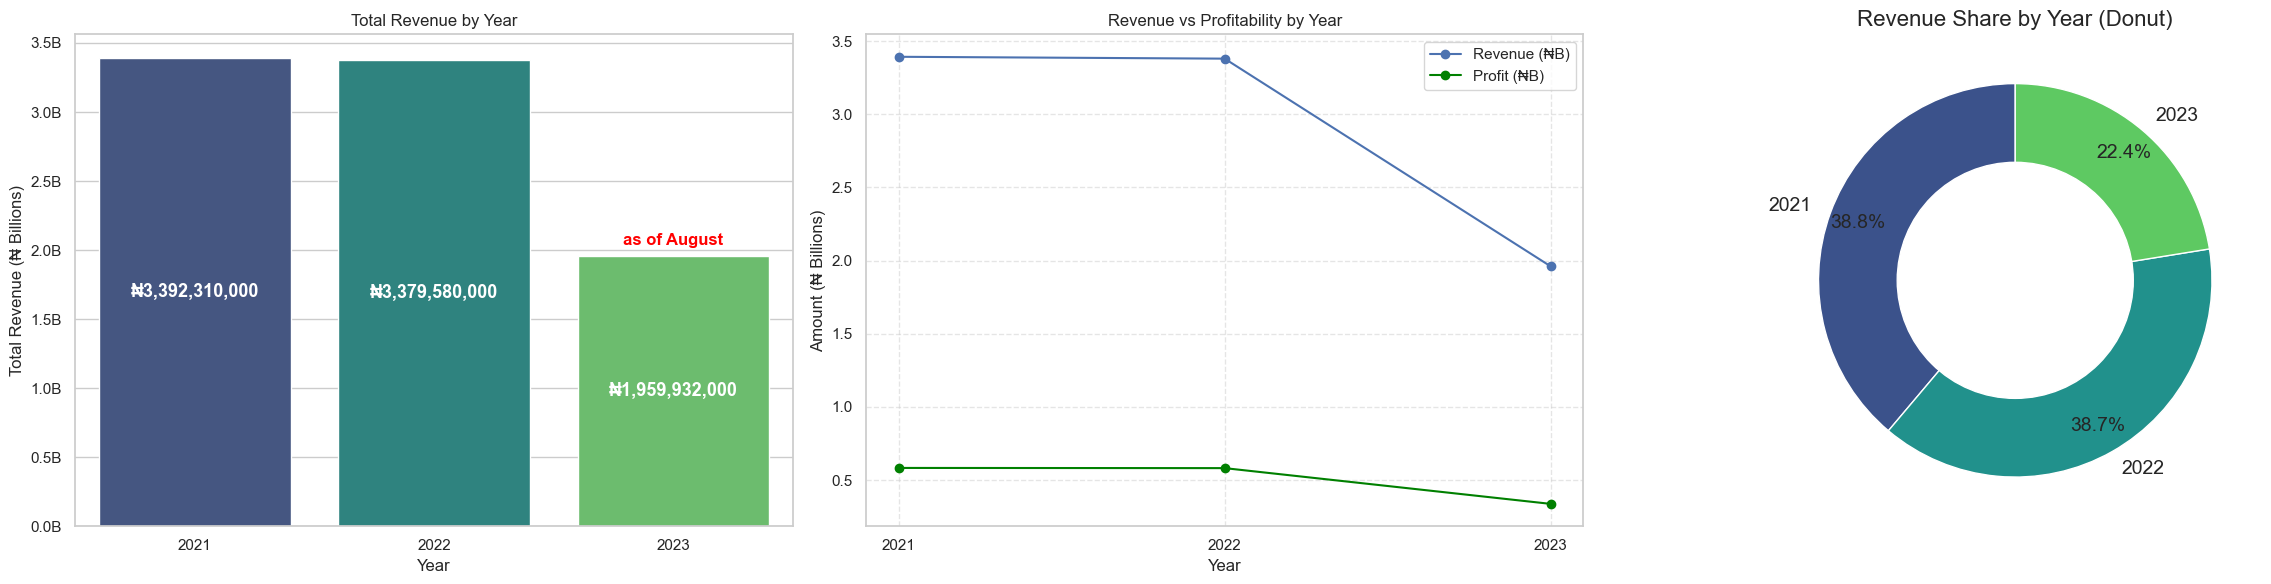

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# --- Bar plot: Total Revenue by Year ---
sns.barplot(x='year', y='revenue', data=df_year, palette='viridis', ax=axes[0])
axes[0].set_title('Total Revenue by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Revenue (₦ Billions)')
axes[0].set_yticklabels([f'{y/1e9:.1f}B' for y in axes[0].get_yticks()])

for i, row in df_year.iterrows():
    axes[0].text(
        i, 
        row['revenue'] / 2,
        f"₦{row['revenue']:,}", 
        ha='center', 
        va='center', 
        color='white', 
        fontsize=13, 
        fontweight='bold'
    )

idx_2023 = df_year[df_year['year'] == '2023'].index[0]
revenue_2023 = df_year.loc[idx_2023, 'revenue']
axes[0].text(
    idx_2023, 
    revenue_2023 + revenue_2023 * 0.03,
    'as of August', 
    ha='center', 
    va='bottom', 
    color='red', 
    fontsize=12, 
    fontweight='bold'
)

# --- Line plot: Revenue vs Profitability by Year ---
profit_by_year = df.groupby('year')['profit'].sum().reindex(df_year['year']).reset_index()
axes[1].plot(df_year['year'], df_year['revenue']/1e9, marker='o', label='Revenue (₦B)')
axes[1].plot(profit_by_year['year'], profit_by_year['profit']/1e9, marker='o', label='Profit (₦B)', color='green')
axes[1].set_title('Revenue vs Profitability by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Amount (₦ Billions)')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# --- Donut chart: Revenue Share by Year ---
revenue_shares = df_year['revenue']
labels = df_year['year']
colors = sns.color_palette('viridis', len(labels))
wedges, texts, autotexts = axes[2].pie(
    revenue_shares,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    textprops={'fontsize': 14}
)
# Draw circle for donut
centre_circle = plt.Circle((0,0),0.60,fc='white')
axes[2].add_artist(centre_circle)
axes[2].set_title('Revenue Share by Year (Donut)', fontsize=16)

plt.tight_layout()
plt.show()

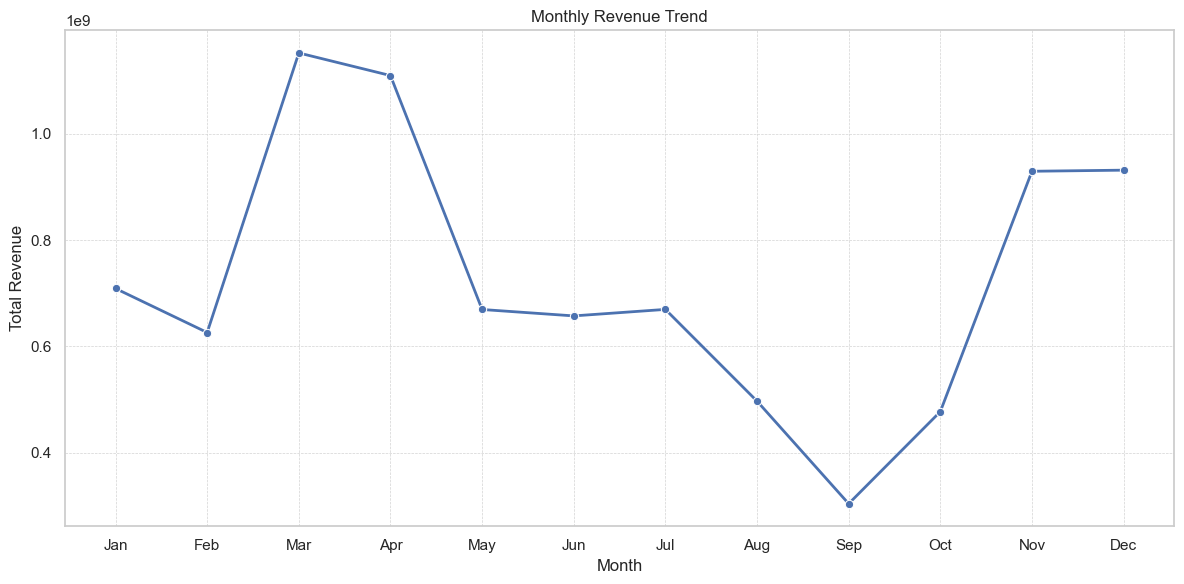

In [114]:
# Group data by month
monthly_revenue = df.groupby('month_name')['revenue'].sum().reset_index()

# Define the correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set month_name as categorical with the correct order
monthly_revenue['month_name'] = pd.Categorical(monthly_revenue['month_name'], categories=month_order, ordered=True)
monthly_profit = monthly_revenue.sort_values('month_name')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month_name', y='revenue', marker='o', linewidth=2)
plt.title('Monthly Revenue Trend')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

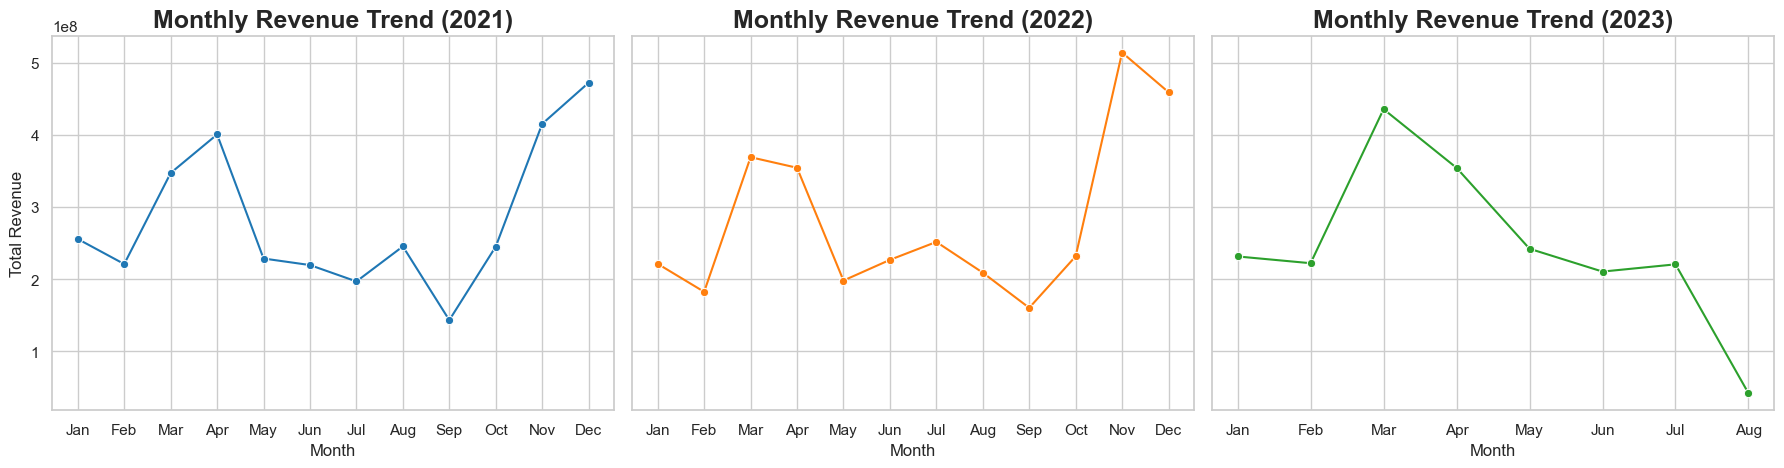

In [ ]:
# Chart for monthly revenue trend across multiple years
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example: blue, orange, green

fig, axes = plt.subplots(1, len(years), figsize=(18, 5), sharey=True) # type: ignore

for ax, y, color in zip(axes, years, colors): # type: ignore
    sns.lineplot(
        data=monthly_data[y], # type: ignore
        x='month_name',
        y='revenue',
        marker='o',
        ax=ax,
        color=color
    )
    ax.set_title(f'Monthly Revenue Trend ({y})', fontsize=18, fontweight='bold')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Revenue' if y == years[0] else "") # type: ignore
    ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15232\4048531540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='year', y='yoy_growth', palette='viridis')


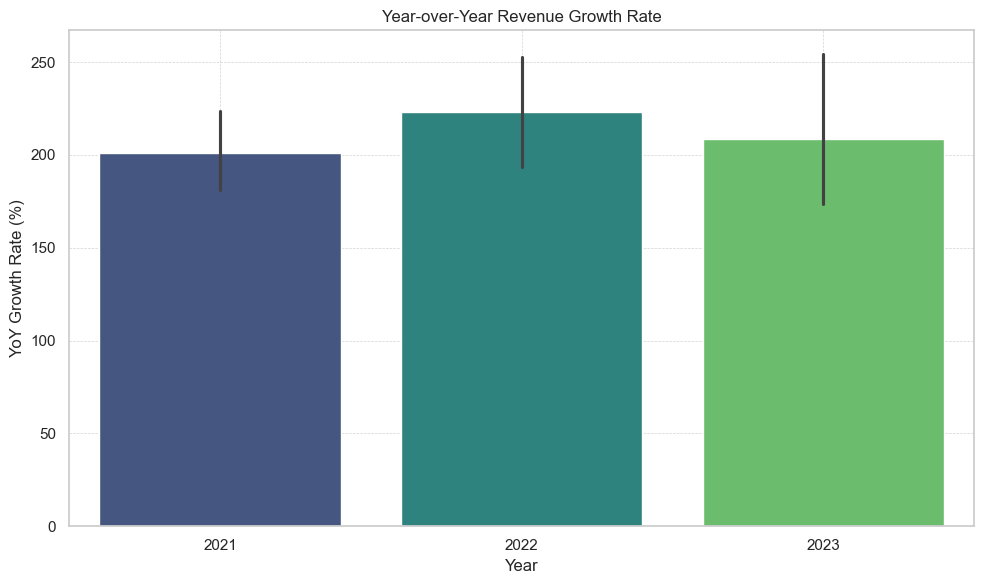

In [120]:
# calculate yoy revenue growth rate
df['yoy_growth'] = df.groupby('year')['revenue'].pct_change() * 100
# Plot YoY growth rate
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='yoy_growth', palette='viridis')
plt.title('Year-over-Year Revenue Growth Rate')
plt.xlabel('Year')
plt.ylabel('YoY Growth Rate (%)')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

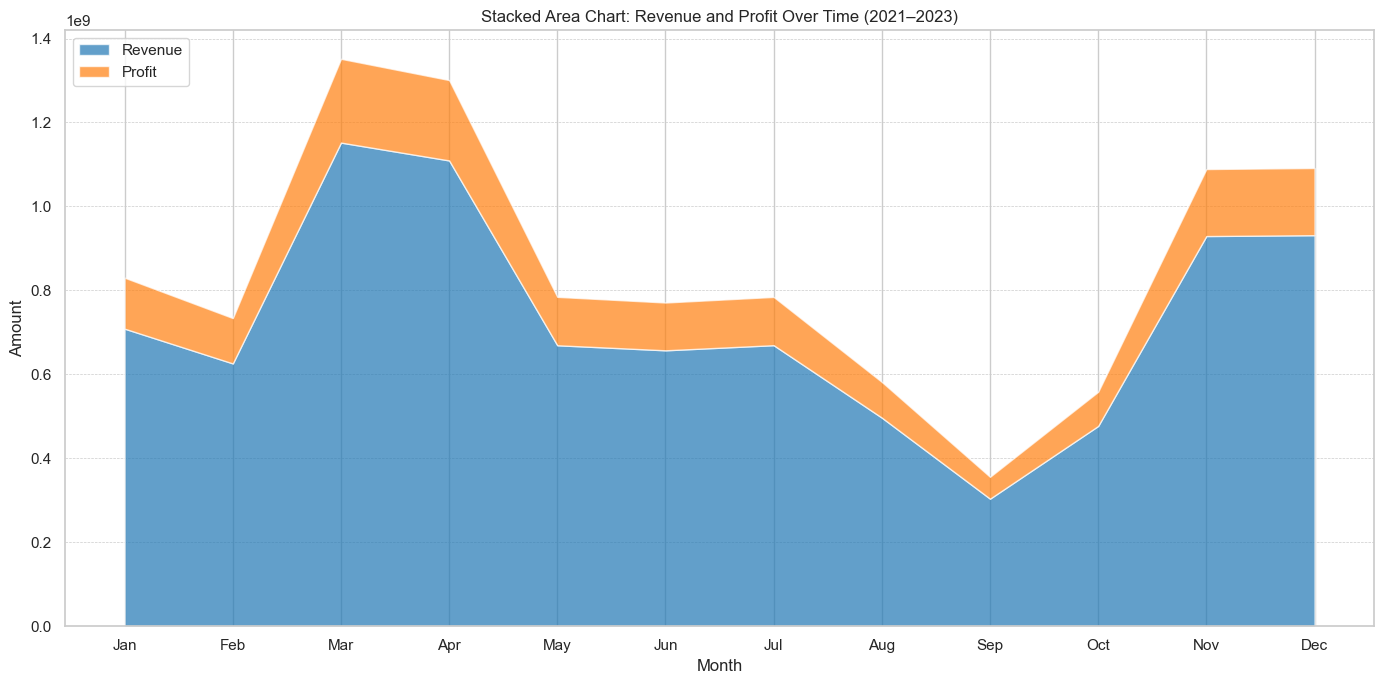

In [ ]:
# Aggregate monthly revenue and profit
monthly_metrics = df.groupby('month_name')[['revenue', 'profit']].sum().reset_index()
monthly_metrics['month_name'] = pd.Categorical(monthly_metrics['month_name'], categories=month_order, ordered=True)
monthly_metrics = monthly_metrics.sort_values('month_name')

# Prepare data for stacked area chart
plt.figure(figsize=(14, 7))
plt.stackplot(
    monthly_metrics['month_name'],
    monthly_metrics['revenue'],
    monthly_metrics['profit'],
    labels=['Revenue', 'Profit'],
    colors=['#1f77b4', '#ff7f0e'],
    alpha=0.7
)
plt.title('Stacked Area Chart: Revenue and Profit Over Time (2021–2023)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(loc='upper left')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

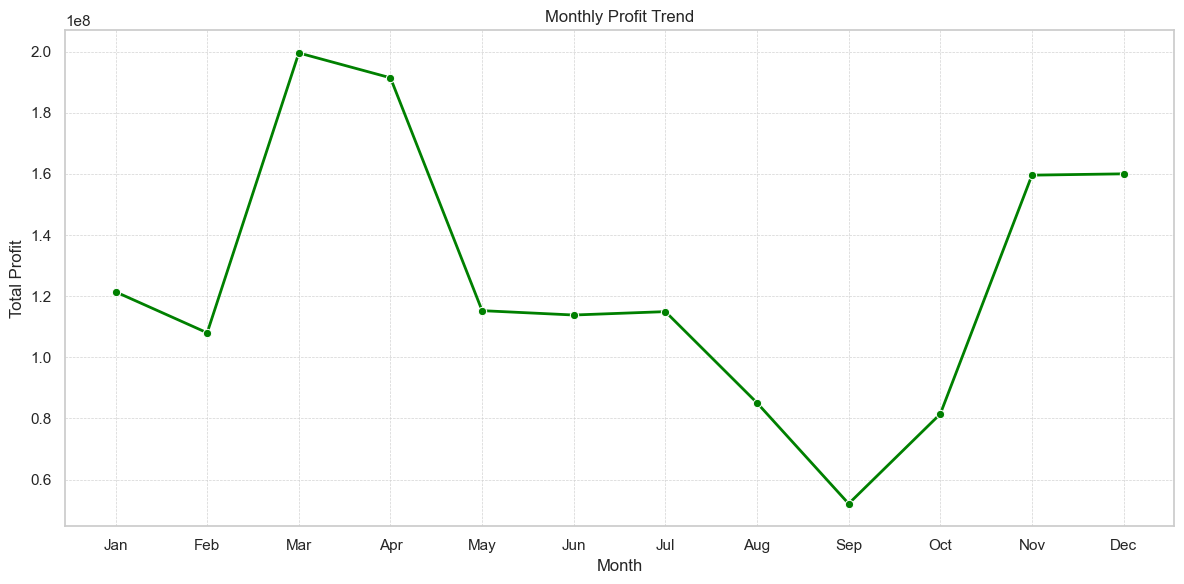

In [ ]:
# Calculate the monthly profit
monthly_profit = df.groupby('month_name')['profit'].sum().reset_index()

# Define the correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set month_name as categorical with the correct order
monthly_profit['month_name'] = pd.Categorical(monthly_profit['month_name'], categories=month_order, ordered=True)
monthly_profit = monthly_profit.sort_values('month_name')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_profit, x='month_name', y='profit', marker='o', color='green', linewidth=2)
plt.title('Monthly Profit Trend')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


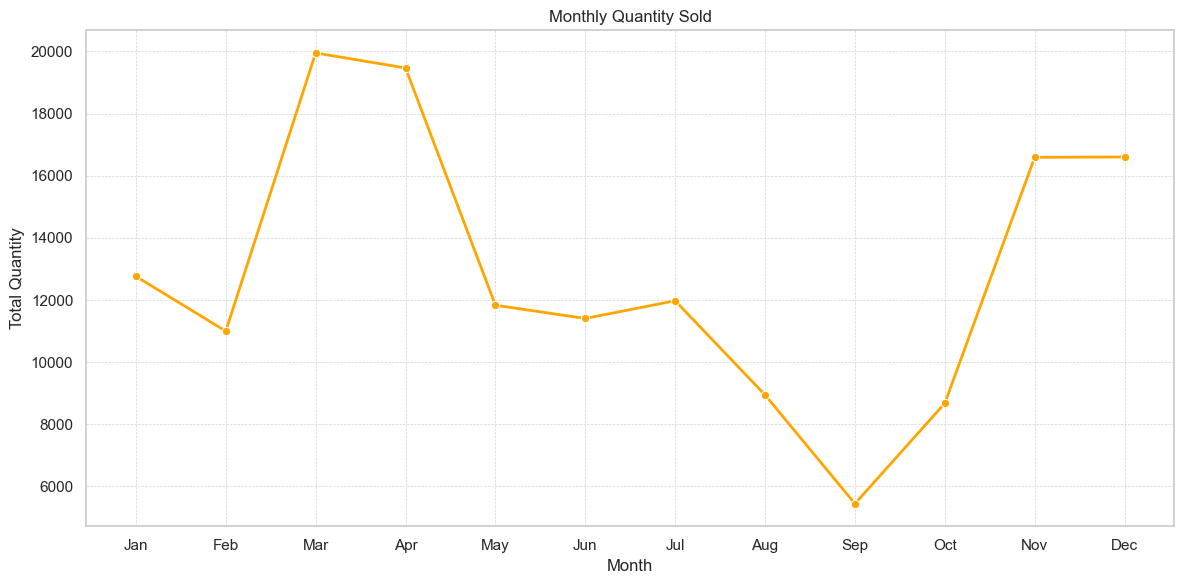

In [73]:
# Group by month
monthly_quantity = df.groupby('month_name')['Quantity'].sum().reset_index()

# Define the correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set month_name as categorical with the correct order
monthly_quantity['month_name'] = pd.Categorical(monthly_quantity['month_name'], categories=month_order, ordered=True)
monthly_quantity = monthly_quantity.sort_values('month_name')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_quantity, x='month_name', y='Quantity', marker='o', color='orange', linewidth=2)
plt.title('Monthly Quantity Sold')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# Group by sales rep and summarize
rep_perf = df.groupby('sales_reps').agg(
    orders=('OrderID', 'count'),
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_discount=('discount', 'mean'),
    avg_delivery_time=('delivery_time', 'mean')
).reset_index()

# Sort by revenue
rep_perf = rep_perf.sort_values(by='total_revenue', ascending=False)
rep_perf.reset_index(drop=True, inplace=True)
# Display
rep_perf.head(10)# Top 10 reps


,sales_reps,orders,total_revenue,total_profit,avg_discount,avg_delivery_time
0,Funmi Adebayo,2180,1468122000,252982000,0.972477,3.388991
1,Chike Obi,2221,1458182000,251567000,1.078343,3.524538
2,Adeola Johnson,2148,1327750800,227366800,0.926443,3.440875
3,Bisi Awolowo,753,976334400,168132400,0.922975,3.434263
4,Tunde Ogunleye,858,946100800,163281800,0.920746,3.327506
5,Ngozi Eze,1452,701945600,120422600,0.881543,3.528926
6,Abdul Mohammed,1431,544767600,93664600,0.911950,3.438155
7,Afolabi Ige,1700,364946400,62874400,0.961765,3.572353
8,Segun Adesina,839,201908400,35066400,1.078665,3.417163
9,Yemi Akande,789,189531200,32705200,1.077313,3.513308


C:\Users\USER\AppData\Local\Temp\ipykernel_15232\2665368378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rep_perf.head(5), x='sales_reps', y='total_revenue', palette='Blues_d')


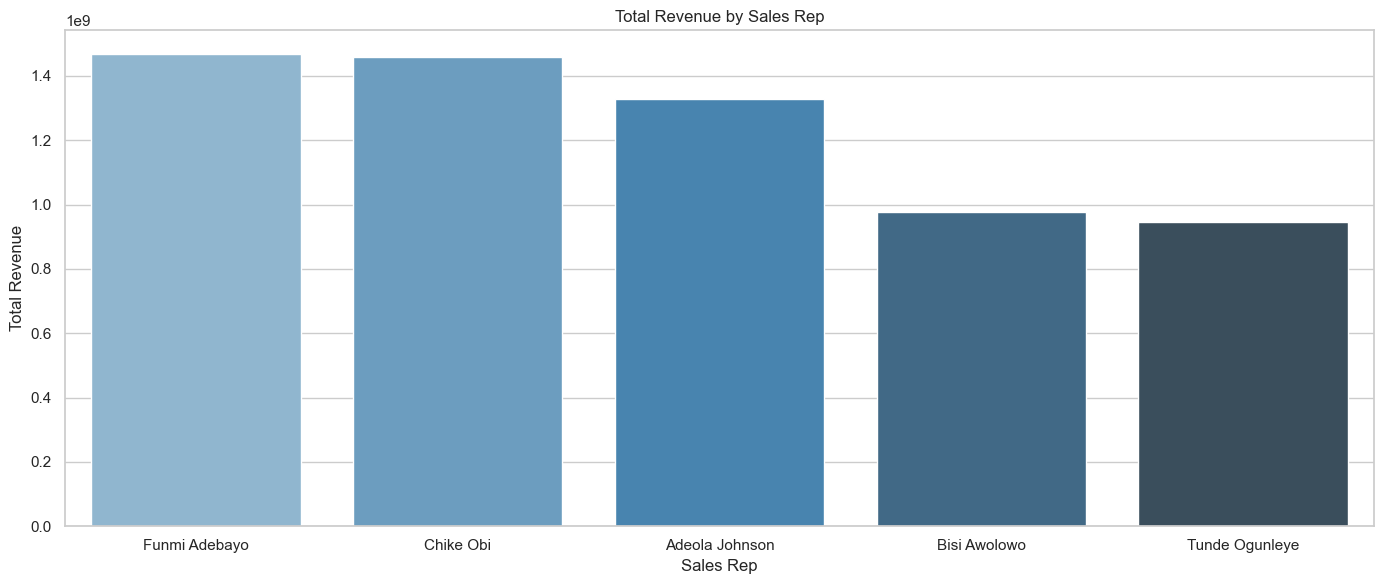

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=rep_perf.head(5), x='sales_reps', y='total_revenue', palette='Blues_d')
plt.title('Total Revenue by Sales Rep')
plt.xlabel('Sales Rep')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


In [47]:
# Group by customer
customer_perf = df.groupby('customer_name').agg(
    orders=('OrderID', 'count'),
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_discount=('discount', 'mean'),
    avg_quantity=('Quantity', 'mean')
).reset_index()

# Sort by revenue
customer_perf = customer_perf.sort_values(by='total_revenue', ascending=False)
customer_perf.reset_index(drop=True, inplace=True)
# Display top customers
customer_perf.head(10)


,customer_name,orders,total_revenue,total_profit,avg_discount,avg_quantity
0,Bradenburg Multichoice,1916,2192697600,378004600,0.931628,20.164405
1,Ace Supermarket,1907,2158859600,370806600,0.917672,20.191400
2,Deprince Supermarket,1918,2099976800,359872800,0.925443,19.663191
3,Css Bookshop,2035,485946400,84149400,0.972973,4.145946
4,Real Treasure Christian Bookshop,1935,465253200,80512200,1.015504,4.184496
5,Bible Wonderland,1977,454689600,78866600,1.057157,3.968639
6,Baptist Bookshop,1937,445710400,76883400,0.900878,4.046980
7,The Lamb Christian Bookshop,2053,428688400,73781400,0.979055,3.698003


C:\Users\USER\AppData\Local\Temp\ipykernel_15232\140402562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='customer_name', y='total_revenue', palette='Greens_d')


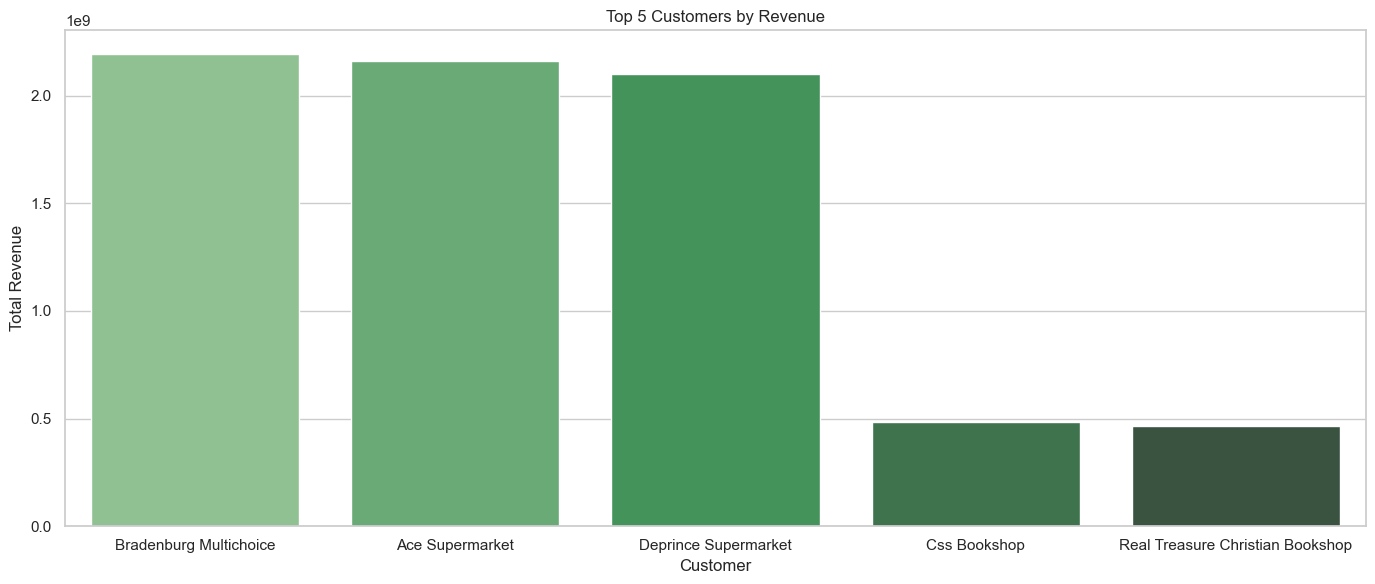

In [48]:
# Bar plot of top 10 customers by revenue
top_customers = customer_perf.head(5)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_customers, x='customer_name', y='total_revenue', palette='Greens_d')
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Customer')
plt.ylabel('Total Revenue')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Group by product
product_perf = df.groupby('product_name').agg(
    units_sold=('Quantity', 'sum'),
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_discount=('discount', 'mean')
).reset_index()

# Sort by revenue
product_perf = product_perf.sort_values(by='total_revenue', ascending=False)

# Display top products
product_perf.head(10)


,product_name,units_sold,total_revenue,total_profit,avg_discount
0,100pcs in a jar,49618,2500747200,416791200,0.931077
1,100pcs in nylon,28544,2283520000,428160000,0.911990
3,500pcs in a jar,38501,1986651600,331108600,0.961838
2,250pcs in a jar,38002,1960903200,326817200,1.045701


C:\Users\USER\AppData\Local\Temp\ipykernel_15232\3028883871.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_name', y='total_revenue', palette='Purples_d')


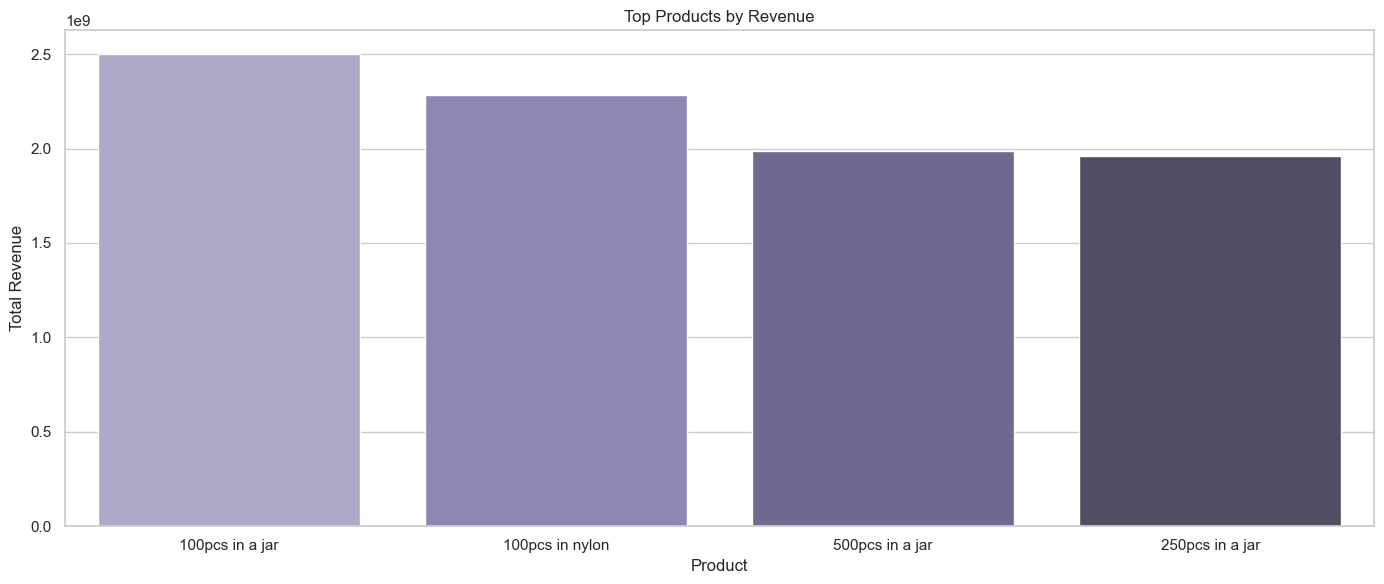

In [50]:
# Top 10 products by revenue
top_products = product_perf.head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_products, x='product_name', y='total_revenue', palette='Purples_d')
plt.title('Top Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


In [51]:
# Group by location
location_perf = df.groupby('location').agg(
    orders=('OrderID', 'count'),
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_discount=('discount', 'mean'),
    avg_delivery_time=('delivery_time', 'mean')
).reset_index()

# Sort by revenue
location_perf = location_perf.sort_values(by='total_revenue', ascending=False)

# Display
location_perf.head(10)


,location,orders,total_revenue,total_profit,avg_discount,avg_delivery_time
1,Lagos,7923,5203419200,894513200,0.968699,3.484791
2,Ogun,1827,2121834400,365727400,0.930487,3.399015
5,Oyo,1841,445363200,77112200,1.029332,3.535578
0,Abuja,1841,425958800,73494800,0.909832,3.329712
3,Osun,1958,412805200,71074200,0.967824,3.491318
4,Other,140,64567600,11084600,0.714286,3.700000


C:\Users\USER\AppData\Local\Temp\ipykernel_15232\2273812128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_perf, x='location', y='total_revenue', palette='Reds_d')


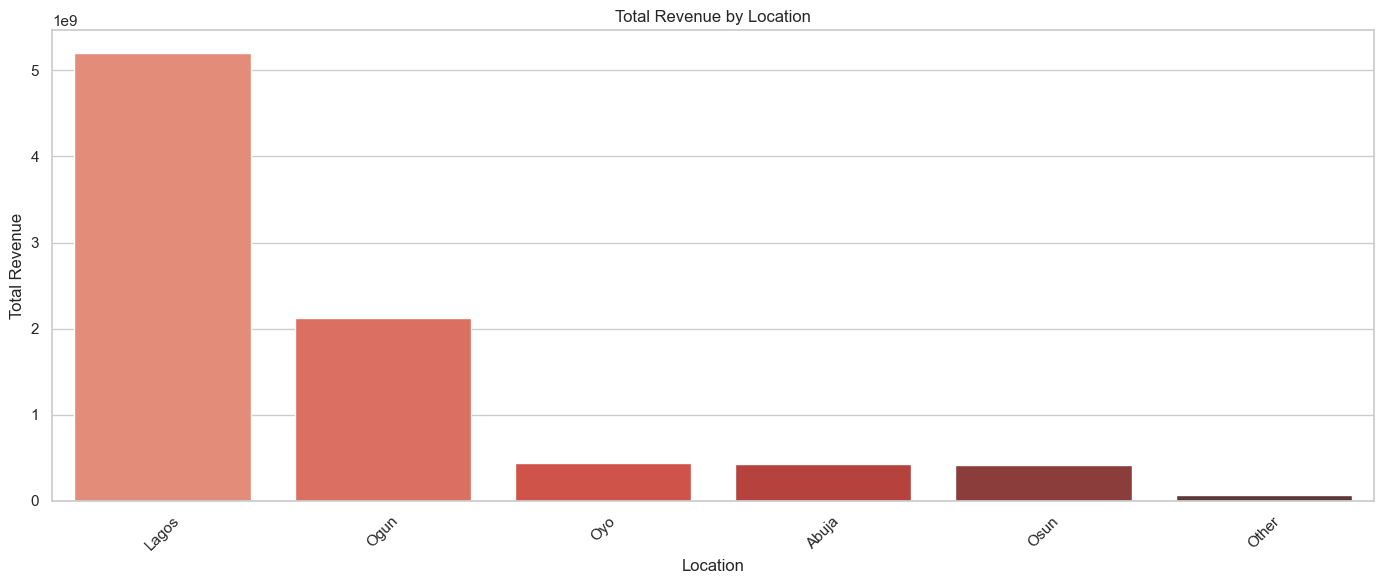

In [52]:
plt.figure(figsize=(14, 6))
sns.barplot(data=location_perf, x='location', y='total_revenue', palette='Reds_d')
plt.title('Total Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
# Group your actual dataset by location
location_revenue = df.groupby('location')['revenue'].sum().reset_index()
location_revenue


,location,revenue
0,Abuja,425958800
1,Lagos,5203419200
2,Ogun,2121834400
3,Osun,412805200
4,Other,64567600
5,Oyo,445363200


In [54]:
# Predefined coordinates for your known locations
location_coords = {
    'Lagos': (6.5244, 3.3792),
    'Ogun': (6.9980, 3.4737),
    'Oyo': (7.3775, 3.9470),
    'Osun': (7.5629, 4.5199),
    'Abuja': (9.0579, 7.4951),
    'Other': (8.0000, 5.0000)  # Approximate center
}

# Map coords to DataFrame
location_revenue['lat'] = location_revenue['location'].apply(lambda x: location_coords.get(x, (0, 0))[0])
location_revenue['lon'] = location_revenue['location'].apply(lambda x: location_coords.get(x, (0, 0))[1])


In [ ]:
import folium

# Base map centered in Nigeria
nigeria_map = folium.Map(location=[8.5, 4.5], zoom_start=6)

import numpy as np

# Normalize radius: scale revenue from 5–25 pixels
min_rev = location_revenue['revenue'].min()
max_rev = location_revenue['revenue'].max()

def scale_radius(rev, min_val, max_val, min_radius=5, max_radius=25):
    return min_radius + (rev - min_val) / (max_val - min_val) * (max_radius - min_radius)

# Create map
nigeria_map = folium.Map(location=[8.5, 4.5], zoom_start=6)

# Add properly scaled bubbles
for _, row in location_revenue.iterrows():
    radius = scale_radius(row['revenue'], min_rev, max_rev)
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=radius,
        popup=(f"{row['location']}: ₦{row['revenue']:,}"),
        color='navy',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(nigeria_map)

nigeria_map





In [56]:
df['revenue'].sum()

np.int64(8731822000)

In [97]:
# Calculate the average profit margin as a percentage
df['delivery_time'].mean()


np.float64(3.466577369562444)

In [96]:
# get percentage of each payment method
payment_counts = df['payment_method'].value_counts(normalize=True) * 100
payment_counts


payment_method
Bank Transfer    50.044649
Cash             29.761449
POS              15.365480
Credit            4.828422
Name: proportion, dtype: float64

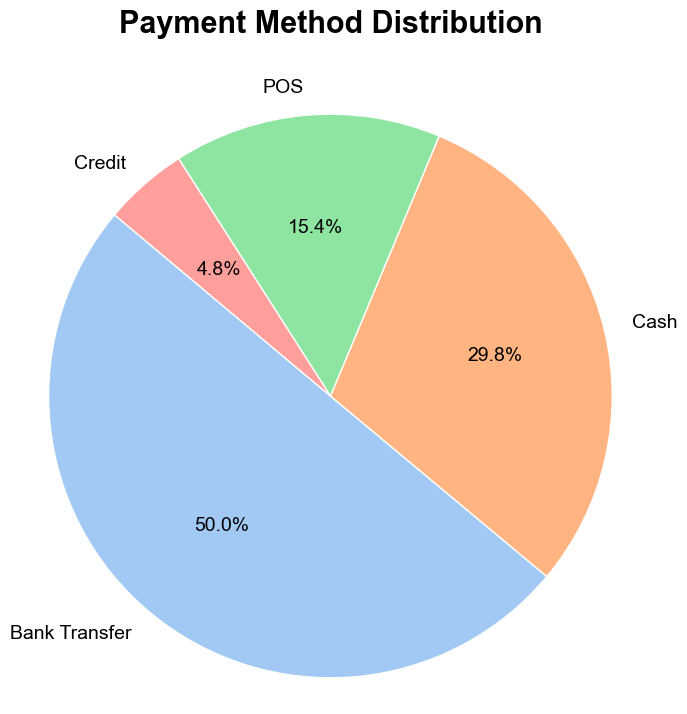

In [ ]:
# Pie chart of payment method distribution
plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    textprops={'color': 'black', 'fontsize': 14}
)
plt.title('Payment Method Distribution', fontsize=22, color='black', weight='bold', pad=40)
plt.axis('equal')
plt.gca().set_facecolor('white')
plt.show()

In [ ]:
from docx import Document
from docx.shared import Pt
import re

# Load the original hymnal
file_path = "/mnt/data/CHURCH HYMNAL.docx"
doc = Document(file_path)

# Create a new document for the formatted output
formatted_doc = Document()
style = formatted_doc.styles['Normal']
font = style.font
font.name = 'Calibri'
font.size = Pt(16)

def split_stanza_into_slides(text):
    # Remove leading/trailing whitespace and fix long dashes
    text = text.strip().replace('–', '-')
    # Split into logical lines by punctuation or line breaks
    lines = re.split(r'\n+', text)
    # Clean and combine lines intelligently
    combined_lines = []
    for line in lines:
        line = line.strip()
        if line:
            combined_lines.append(line)

    words = " ".join(combined_lines).split()
    slides = []
    slide = []
    current_line = ""
    
    for word in words:
        if len(current_line.split()) + 1 <= 6:
            current_line += word + " "
        else:
            slide.append(current_line.strip())
            current_line = word + " "
        if len(slide) == 3:
            slides.append(slide)
            slide = []
    
    if current_line:
        slide.append(current_line.strip())
    if slide:
        slides.append(slide)
    
    # Group into two slides per stanza
    if len(slides) > 2:
        merged_slides = [slides[0], sum(slides[1:], [])[:4]]
        return merged_slides[:2]
    elif len(slides) == 2:
        return slides
    elif len(slides) == 1:
        return [slides[0], []]
    else:
        return []

# Process the original document text
hymn_text = ""
for para in doc.paragraphs:
    line = para.text.strip()
    if not line:
        continue
    # Detect new hymn title
    if re.match(r'^CH: \d+:?', line) or line.isupper():
        if hymn_text:
            # Process the previous hymn block before adding a new one
            stanzas = re.split(r'\n?\s*\d+\.\s+', "\n" + hymn_text.strip())
            stanza_number = 1
            for stanza in stanzas[1:]:
                slides = split_stanza_into_slides(stanza)
                formatted_doc.add_paragraph(f"{stanza_number}.")
                for slide in slides:
                    for l in slide:
                        formatted_doc.add_paragraph(l)
                    formatted_doc.add_paragraph()  # Blank line between slides
                stanza_number += 1
            hymn_text = ""
        formatted_doc.add_paragraph(line)
    else:
        hymn_text += f"\n{line}"

# Handle the final hymn block
if hymn_text:
    stanzas = re.split(r'\n?\s*\d+\.\s+', "\n" + hymn_text.strip())
    stanza_number = 1
    for stanza in stanzas[1:]:
        slides = split_stanza_into_slides(stanza)
        formatted_doc.add_paragraph(f"{stanza_number}.")
        for slide in slides:
            for l in slide:
                formatted_doc.add_paragraph(l)
            formatted_doc.add_paragraph()  # Blank line between slides
        stanza_number += 1

# Save the formatted document
output_path = "/mnt/data/Formatted_Hymnal_for_Holyrics.docx"
formatted_doc.save(output_path)
output_path
